In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
from sklearn import svm 
from sklearn import metrics 
from sklearn.metrics import confusion_matrix

C:\Users\JYOTIKA\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
data = pd.read_csv(r'C:\Users\JYOTIKA\Desktop\thesis\heart1.csv')


In [3]:
features= np.array(data.iloc[:,:12])
features

array([[63. ,  1. ,  1. , ...,  2.3,  3. ,  0. ],
       [67. ,  1. ,  4. , ...,  1.5,  2. ,  3. ],
       [67. ,  1. ,  4. , ...,  2.6,  2. ,  2. ],
       ...,
       [65. ,  1. ,  4. , ...,  2.8,  2. ,  1. ],
       [48. ,  1. ,  4. , ...,  0. ,  1. ,  2. ],
       [63. ,  0. ,  4. , ...,  4. ,  2. ,  3. ]])

In [4]:
labels= data.iloc[:,-1:].values
labels

array([[0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
    

In [5]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features, labels, test_size=0.5, random_state=0)
#0

In [6]:
ml = svm.SVC(kernel='linear') 

ml.fit(x_train, y_train)

y_pred = ml.predict(features)

C:\Users\JYOTIKA\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [7]:
from sklearn.model_selection import train_test_split
X1_train, X1_test, y1_train, y1_test = train_test_split(features,y_pred,test_size=0.30)

In [8]:
from sklearn.neighbors import KNeighborsClassifier

In [9]:
k=[i for i in range(1,30)]
print(k)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]


In [10]:
from sklearn.metrics import accuracy_score
accuracy=[]
for i in k:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X1_train, y1_train)
    y1_pred = knn.predict(X1_test)
    accuracy.append(accuracy_score(y1_test, y1_pred))

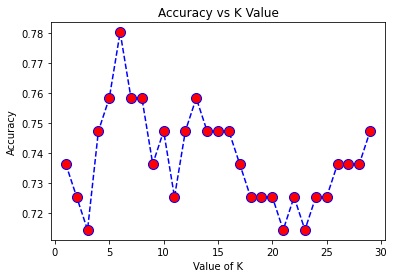

In [11]:
plt.xlabel("Value of K")
plt.ylabel("Accuracy")
plt.title("Accuracy vs K Value")
plt.plot(k,accuracy,color='blue', linestyle='dashed', marker='o',markerfacecolor='red', markersize=10)

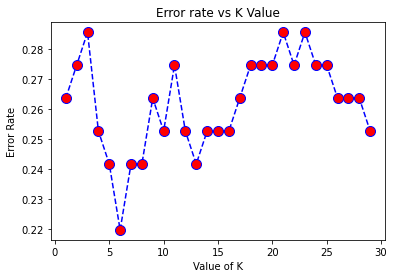

In [12]:
error=[(1-i) for i in accuracy]
plt.xlabel("Value of K")
plt.ylabel("Error Rate")
plt.title("Error rate vs K Value")
plt.plot(k,error,color='blue', linestyle='dashed', marker='o',markerfacecolor='red', markersize=10)

In [13]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X1_train, y1_train)
y_pred = knn.predict(X1_test)
print("Accuracy:",accuracy_score(y1_test, y1_pred))

Accuracy: 0.7472527472527473


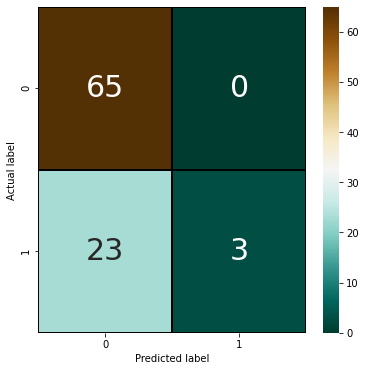

In [14]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y1_test, y1_pred)
f,ax = plt.subplots(figsize=(6, 6))
sns.heatmap(cm, annot=True,cmap='BrBG_r',linewidths=1, linecolor='black',annot_kws={"size": 30})
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

In [15]:
TP=cm[0][0]
TN=cm[1][1]
FN=cm[1][0]
FP=cm[0][1]
print('Accuracy for the hybrid model:',(TP+TN)/(TP+TN+FN+FP))
print('Sensitivity for the hybrid model:',(TP/(TP+FN)))
print('Specificity for the hybrid model:',(TN/(TN+FP)))
print('Precision for the hybrid model:',(TP/(TP+FP)))

Accuracy for the hybrid model: 0.7472527472527473
Sensitivity for the hybrid model: 0.7386363636363636
Specificity for the hybrid model: 1.0
Precision for the hybrid model: 1.0
